In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
data = pd.read_csv(
    "/home/adminuser/Desktop/courses/kjsce/dwm/exp-seven-dwm/mall_customers.csv")
print(data.head())
print(data.isnull().any())

data = data.iloc[:, [2, 3, 4]].values
print(data.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool
(200, 3)


In [3]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)

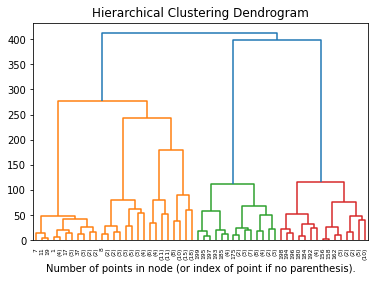

In [4]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [5]:
agglo = AgglomerativeClustering(n_clusters=5)
predictions = agglo.fit_predict(data)

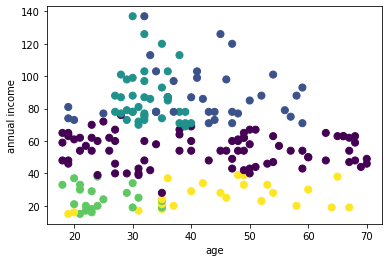

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=predictions, s=50, cmap='viridis')
plt.xlabel("age")
plt.ylabel("annual income")
plt.show()

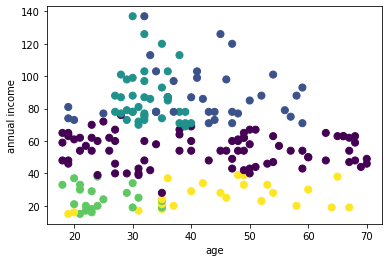

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=predictions, s=50, cmap='viridis')
plt.xlabel("age")
plt.ylabel("annual income")
plt.show()

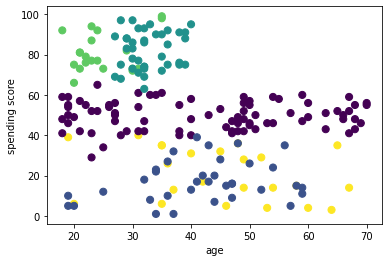

In [8]:
plt.scatter(data[:, 0], data[:, 2], c=predictions, s=50, cmap='viridis')
plt.xlabel("age")
plt.ylabel("spending score")
plt.show()

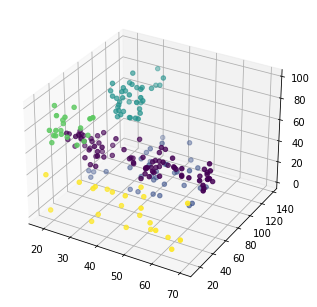

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=predictions)
plt.show()